Architecture of a classification model
1. Input layer shape - Same as number of features.
2. Hidden shape - Problem specific(minimum-1 and maximum-unlimited)
3. Neurons per hidden layer - Problem specific, generally 10 to 100
4. Output layer shape - 1(for binary) / 1 per class
5. Hidden activation - usually ReLU(can try linear)
6. Output activation - Sigmoid(for binary classification) / Softmax(for multiclass)
7. Loss function - Cross entropy / categorical cross entropy
8. Optimizer - SGD, Adam

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_circles
n_samples=1000

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [3]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [4]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [5]:
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [6]:
circles.label.value_counts()

1    500
0    500
Name: label, dtype: int64

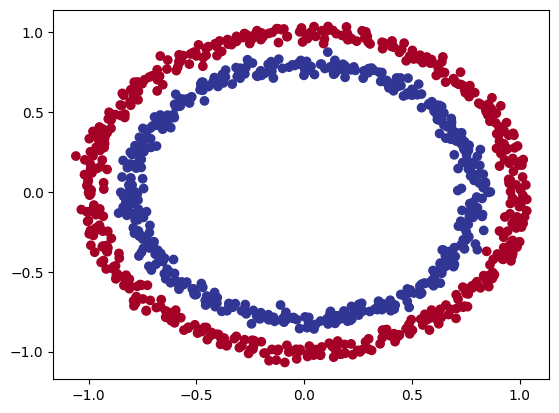

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

In [8]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), # binary since we are working with 2 clases (0 & 1)
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 5.6387 - accuracy: 0.4810
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 4.6929 - accuracy: 0.4830
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 1.3915 - accuracy: 0.4840
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7268 - accuracy: 0.4950
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7047 - accuracy: 0.5000


In [9]:
model_1.fit(X, y, epochs=200, verbose=0) # set verbose=0 to remove training updates
model_1.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

#### Improving the model. Adding one more layer.

In [10]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model (same as model_1 but with an extra layer)
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1), # add an extra layer
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit the model
model_2.fit(X, y, epochs=100, verbose=0) # set verbose=0 to make the output print less

In [11]:
model_2.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 7.6246 - accuracy: 0.5000


[7.6246185302734375, 0.5]

### Adding 3 layers now. and changing optimizer to Adam

In [12]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model (same as model_1 but with an extra layer)
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), # add an extra layer
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=1)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 3.5378 - accuracy: 0.4680
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8549 - accuracy: 0.4540
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7270 - accuracy: 0.4800
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7050 - accuracy: 0.4490
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6966 - accuracy: 0.4410
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6947 - accuracy: 0.4730
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6937 - accuracy: 0.4880
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6947 - accuracy: 0.4950
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.4920
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6943 - accuracy: 0.4280
Epoch 11/

In [13]:
model_3.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6969 - accuracy: 0.5070


[0.6968602538108826, 0.5070000290870667]

In [14]:
def plot_decision_boundary(model, X, y):

  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()]

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 1ms/step
doing binary classifcation...


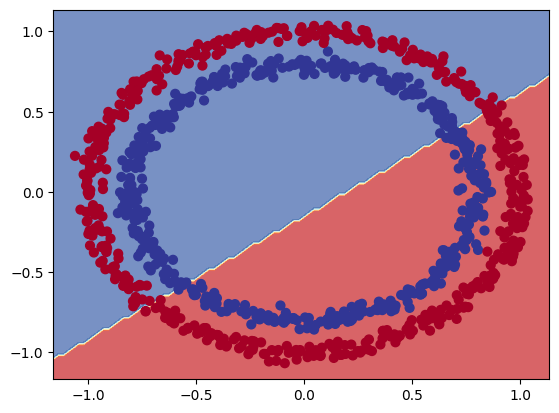

In [15]:
plot_decision_boundary(model_3, X, y)

In [16]:
# Set random seed
tf.random.set_seed(42)

# Create some regression data
X_regression = np.arange(0, 1000, 5)
y_regression = np.arange(100, 1100, 5)

# Split it into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the data
# Note: Before TensorFlow 2.7.0, this line would work
# model_3.fit(X_reg_train, y_reg_train, epochs=100)

# After TensorFlow 2.7.0, see here for more: https://github.com/mrdbourke/tensorflow-deep-learning/discussions/278
model_3.fit(tf.expand_dims(X_reg_train, axis=-1),
            y_reg_train,
            epochs=100)

Epoch 1/100


ValueError: ignored

In [17]:
# Setup random seed
tf.random.set_seed(42)

# Recreate the model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Change the loss and metrics of our compiled model
model_3.compile(loss=tf.keras.losses.mae, # change the loss function to be regression-specific
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae']) # change the metric to be regression-specific

# Fit the recompiled model
model_3.fit(tf.expand_dims(X_reg_train, axis=-1),
            y_reg_train,
            epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 5ms/step - loss: 452.7341 - mae: 452.7341
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 344.4628 - mae: 344.4628
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 239.7043 - mae: 239.7043
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 129.8393 - mae: 129.8393
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 49.7347 - mae: 49.7347
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 83.3637 - mae: 83.3637
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 74.7462 - mae: 74.7462
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 45.9503 - mae: 45.9503
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 50.4684 - mae: 50.4684
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 43.9507 - mae: 43.9507
Epoch 11/100
5/5 [==============================] -

2/2 [==============================] - 0s 6ms/step


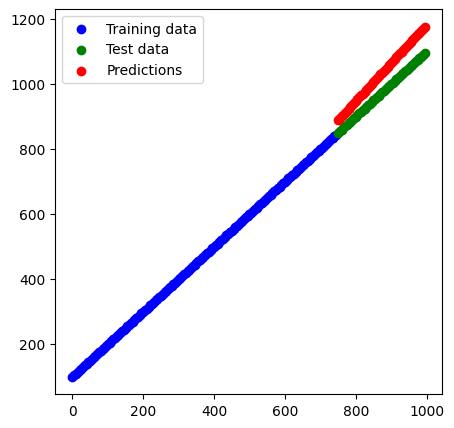

In [18]:
y_reg_preds = model_3.predict(X_reg_test)

plt.figure(figsize=(5,5))
plt.scatter(X_reg_train, y_reg_train, c='b', label='Training data')
plt.scatter(X_reg_test, y_reg_test, c='g', label='Test data' )
plt.scatter(X_reg_test, y_reg_preds, c='r', label='Predictions')
plt.legend();

### Add a activation layer to our classification model.
1. Linear
2. relu
3. sigmoid (for output layer)

In [19]:
tf.random.set_seed(42)
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear),
    tf.keras.layers.Dense(1)
])

model_4.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
                metrics=['accuracy'])

history=model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 1.1082 - accuracy: 0.5100
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7020 - accuracy: 0.5040
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7154 - accuracy: 0.5100
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7003 - accuracy: 0.4830
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7005 - accuracy: 0.5120
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6947 - accuracy: 0.5320
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6968 - accuracy: 0.5060
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7054 - accuracy: 0.4810
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6955 - accuracy: 0.4970
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.4960
Epoch 11/

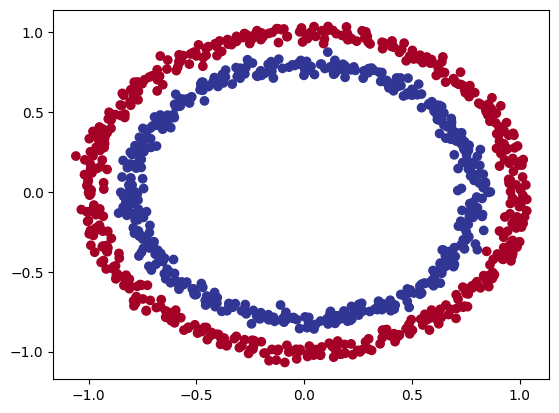

In [20]:
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu);

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


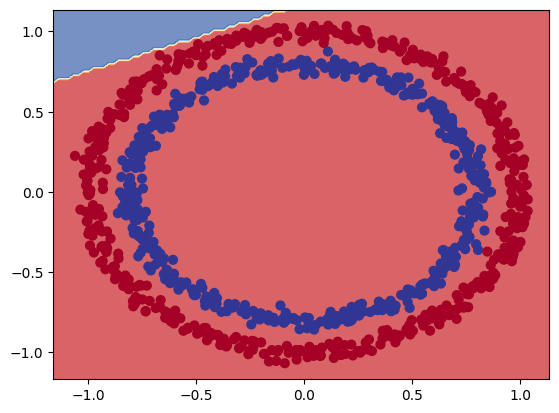

In [21]:
plot_decision_boundary(model_4, X, y)

In [22]:
tf.random.set_seed(42)
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1)
])

model_5.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

history=model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/

In [26]:
tf.random.set_seed(42)
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1)
])

model_6.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

history=model_6.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 4.2743 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1616 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1036 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9435 - accuracy: 0.4890
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7709 - accuracy: 0.4550
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7626 - accuracy: 0.4460
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7569 - accuracy: 0.4360
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7512 - accuracy: 0.4260
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7014 - accuracy: 0.4180
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 3.6578 - accuracy: 0.4120
Epoch 11/

In [27]:
model_6.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.4118 - accuracy: 0.9170


[0.4117948114871979, 0.9169999957084656]

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


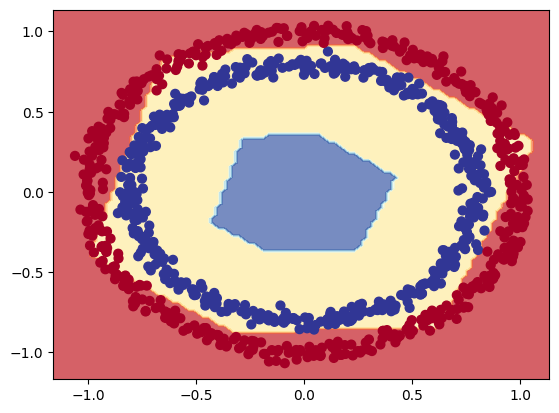

In [28]:
plot_decision_boundary(model_6, X, y)

In [39]:
tf.random.set_seed(42)

model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

model_7.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['accuracy'])

history = model_7.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.6923 - accuracy: 0.4980
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6879 - accuracy: 0.5550
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6781 - accuracy: 0.5500
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6662 - accuracy: 0.6150
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6515 - accuracy: 0.6260
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6279 - accuracy: 0.7010
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5997 - accuracy: 0.7450
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5591 - accuracy: 0.7640
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5230 - accuracy: 0.7750
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4769 - accuracy: 0.8100
Epoch 11/

In [40]:
model_7.evaluate(X,y)

32/32 [==============================] - 0s 3ms/step - loss: 0.0342 - accuracy: 0.9920


[0.034179236739873886, 0.9919999837875366]

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


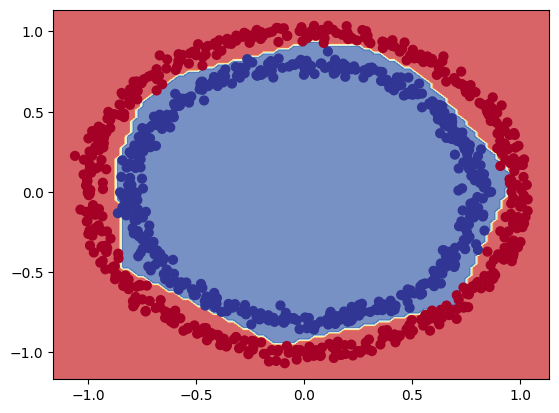

In [41]:
plot_decision_boundary(model_7, X, y)